In [136]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Step 1. Open the data file and study the general information

In [137]:
calls_df = pd.read_csv('./datasets/moved_megaline_calls.csv')
internet_df = pd.read_csv('./datasets/moved_megaline_internet.csv')
messages_df = pd.read_csv('./datasets/moved_megaline_messages.csv')
plans_df = pd.read_csv('./datasets/moved_megaline_plans.csv')
users_df = pd.read_csv('./datasets/moved_megaline_users.csv')


## Step 2. Prepare the data

### Calls

In [147]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%d')
# we want to round up all the calls to the minute since Megaline counts a whole minute even if a call was lasting for just a second
calls_df['duration'] = calls_df['duration'].apply(lambda x: np.ceil(x))
calls_df.info()
calls_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0


<AxesSubplot: ylabel='Frequency'>

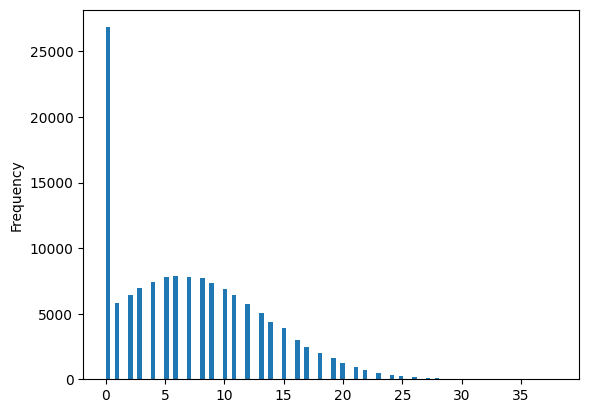

In [148]:
calls_df['duration'].plot(kind='hist', bins=100)

For some reason a lot of call duration is 0.0. May be these are missing calls.

In [187]:
calls_by_user = calls_df.groupby('user_id')['duration'].agg(['count', 'sum'])
calls_by_user.columns = ['number_of_calls', 'total_minutes']
calls_by_user.sort_values(by='total_minutes', ascending=True, inplace=True)
calls_by_user

# TODO: continue here
# https://practicum.com/trainer/data-scientist/lesson/c8ba40c4-35a4-4974-8165-6f98934d2078/?from=program
# For each user, find:
# The number of calls made and minutes used per month
# The number of text messages sent per month
# The volume of data per month
# The monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)

,number_of_calls,total_minutes
user_id,,
1306,3,6.0
1034,2,7.0
1104,4,11.0
1323,3,28.0
1452,3,36.0
...,...,...
1320,1080,7657.0
1362,1121,7899.0
1334,1140,8120.0


### Internet

In [150]:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format='%Y-%m-%d')

# count 0 values in mb_used column
print(f"users with 0 mb spent {internet_df.query('mb_used == 0')['mb_used'].count()}")
print(f"users with more than 0 mb spent {internet_df.query('mb_used != 0')['mb_used'].count()}")

internet_df.info()
internet_df.sample(5, random_state=42)

users with 0 mb spent 13747
users with more than 0 mb spent 91078
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
102423,1490_238,1490,2018-10-15,373.01
12472,1060_181,1060,2018-09-14,875.38
91959,1426_53,1426,2018-12-29,627.48
42208,1187_385,1187,2018-09-20,132.80
64201,1294_122,1294,2018-10-29,397.70


### Messages

In [151]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y-%m-%d')

messages_df.info()
messages_df.sample(5, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


,id,user_id,message_date
58331,1369_132,1369,2018-12-27
24196,1145_51,1145,2018-07-11
9284,1069_42,1069,2018-12-03
44214,1293_1181,1293,2018-10-06
57006,1362_72,1362,2018-05-25


<AxesSubplot: ylabel='Frequency'>

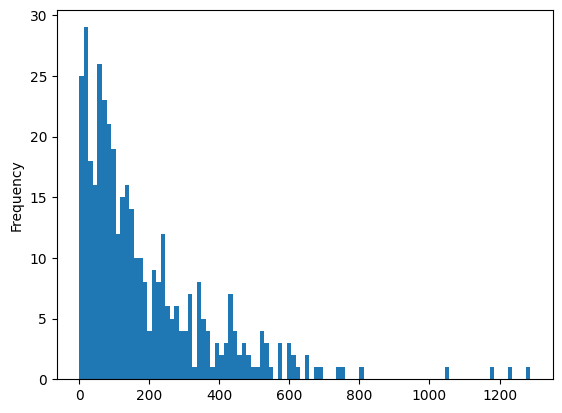

In [194]:
messages_df.groupby('user_id')['id'].count().plot(kind='hist', bins=100)

### Plans

In [152]:
plans_df['plan_name'] = plans_df['plan_name'].astype('category')

plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### Users

In [153]:
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format='%Y-%m-%d')
users_df['plan'] = users_df['plan'].astype('category')

users_df.info()
users_df.sample(5, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    category      
 7   churn_date  34 non-null     object        
dtypes: category(1), datetime64[ns](1), int64(2), object(4)
memory usage: 28.1+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
361,1361,Jacelyn,Hoffman,45,"Birmingham-Hoover, AL MSA",2018-04-14,surf,NaN
73,1073,Grady,Crawford,30,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-04-06,surf,NaN
374,1374,Ching,Watts,55,"Louisville/Jefferson County, KY-IN MSA",2018-02-14,surf,NaN
155,1155,Claude,Hahn,19,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-02-21,ultimate,NaN
104,1104,Thurman,Stephens,20,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-12-23,ultimate,NaN


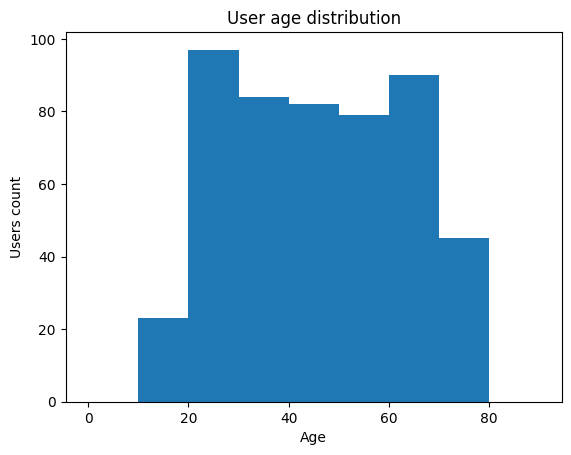

In [154]:
users_age_plot = users_df['age'].plot(kind='hist', bins=range(0, 100, 10), title='User age distribution')
users_age_plot.set_xlabel('Age')
users_age_plot.set_ylabel('Users count')
plt.show()